In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel

In [8]:
import pandas as pd

# Import the Dataset

In [9]:
income_ds = pd.read_csv("income_data.csv", sep=r'\s*,\s*', engine='python')

In [10]:
# have a peak on the dataset
income_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
income_ds.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1    

In [12]:
income_ds.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1    

# Visualize and Explore

**- How's the age distributed and how age distributed differently for <=50k group and >50k group?**

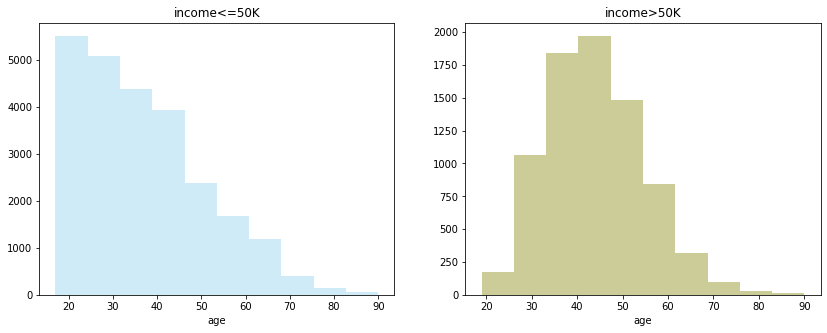

In [15]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)
axes[0].set_title("income<=50K")
axes[1].set_title("income>50K")

sns.distplot(income_ds[income_ds["income"]=="<=50K"]["age"],
             hist=True,kde=False,bins=10,ax=axes[0],color="skyblue")
sns.distplot(income_ds[income_ds["income"]==">50K"]["age"], hist=True,kde=False,bins=10,ax=axes[1], label="income>50K",color="olive")

From the histogram plot above, we found that most of people who earn >50K are around 35-55 years old.While people earning <=50K has decreasing distribution with age increasing.  
  
There is no abnormal  

**- What about age?**

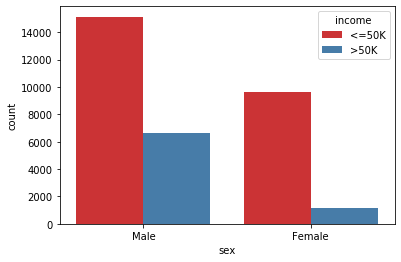

In [16]:
sns.countplot(x=income_ds["sex"],hue=income_ds["income"],palette="Set1")

Oh, we found that mor male observation than female in our dataset.  
And it seems that proportion of male getting mroe than >50K is larger than proportion of female.  

**- How is income different among workclass?**

[Text(0, 0, 'State-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, '?'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Without-pay'),
 Text(0, 0, 'Never-worked')]

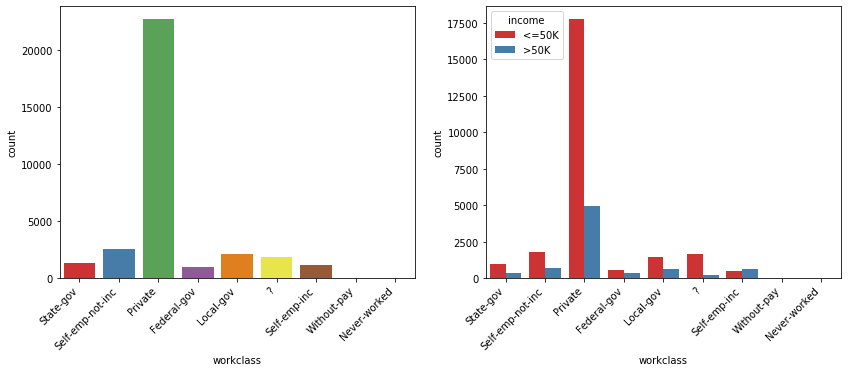

In [17]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)

# f1=sns.barplot(x=income_ds["workclass"].value_counts().keys(), y=income_ds["workclass"].value_counts().values, data=income_ds,ax=axes[0])
# f1.set_xticklabels(f1.get_xticklabels(),rotation=45, horizontalalignment='right')

f1=sns.countplot(data=income_ds,x='workclass',palette='Set1',ax=axes[0])
f1.set_xticklabels(f1.get_xticklabels(),rotation=45, horizontalalignment='right')

f2=sns.countplot(data=income_ds,x='workclass',hue = 'income',palette='Set1',ax=axes[1])
f2.set_xticklabels(f2.get_xticklabels(),rotation=45, horizontalalignment='right')


We found that most of observaton in the dataset are in "Private" workclass.  
Only "Self-emp-inc" has more people earning >50k than people earning <=50k.

(Note that there is one abnormal workclass "?" that needs to be deleted in next step.)



**- How will capital gain of loss affecting the pay?**

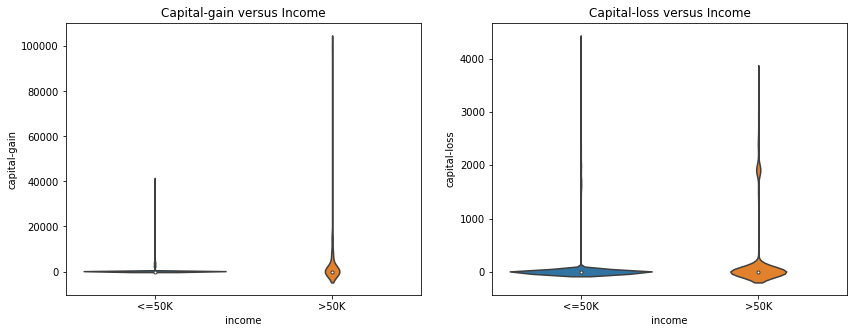

In [18]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)
axes[0].set_title("Capital-gain versus Income")
axes[1].set_title("Capital-loss versus Income")

sns.violinplot(x=income_ds["income"], y=income_ds["capital-gain"],ax=axes[0])
sns.violinplot(x=income_ds["income"], y=income_ds["capital-loss"],ax=axes[1])

It seems there's no much big difference in capital gain or loss for two groups of observation,except that people earning more than 50k may have higher capital gain than people earning less.

**- And what about the marital status and education level?**

Both *education_num* and *education* indicates the education level, we here would ue the *education* because it's more clear to bucket the education level in different category instead of years of education.

[Text(0, 0, 'Bachelors'),
 Text(0, 0, 'HS-grad'),
 Text(0, 0, '11th'),
 Text(0, 0, 'Masters'),
 Text(0, 0, '9th'),
 Text(0, 0, 'Some-college'),
 Text(0, 0, 'Assoc-acdm'),
 Text(0, 0, 'Assoc-voc'),
 Text(0, 0, '7th-8th'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Prof-school'),
 Text(0, 0, '5th-6th'),
 Text(0, 0, '10th'),
 Text(0, 0, '1st-4th'),
 Text(0, 0, 'Preschool'),
 Text(0, 0, '12th')]

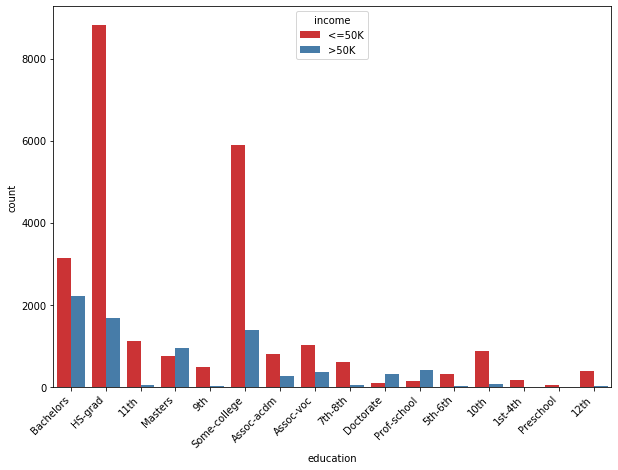

In [19]:
f, axes = plt.subplots(1, 1, figsize=(10, 7), sharex=False)
plt.xlabel('Count')
g = sns.countplot(
    data=income_ds,
    x='education',
    hue = 'income' ,
    palette='Set1'
)
g.set_xticklabels(g.get_xticklabels(),rotation=45, horizontalalignment='right')

The catogories of education are now in a little mess, and need to be cleaned further.

[Text(0, 0, 'Never-married'),
 Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Married-AF-spouse'),
 Text(0, 0, 'Widowed')]

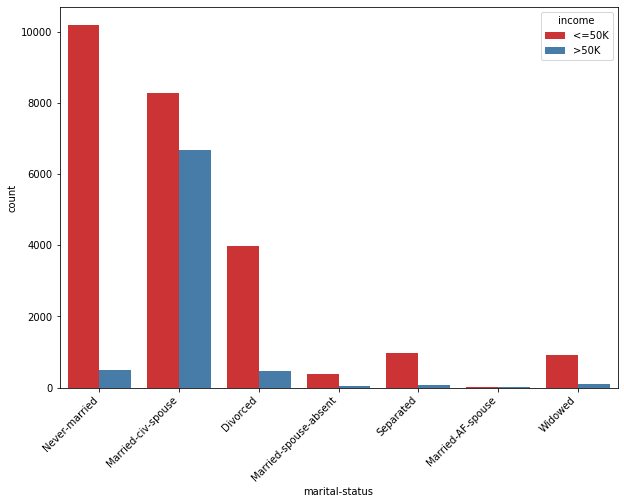

In [20]:
f, axes = plt.subplots(1, 1, figsize=(10, 7), sharex=False)
g=sns.countplot(
    data=income_ds,
    x='marital-status',
    hue='income',
    palette='Set1'
)
g.set_xticklabels(g.get_xticklabels(),rotation=45, horizontalalignment='right')

Ooh, more people in <=50K group are never married than married, while most of people who earn more than 50K are married people. Interesting.  
(Note that married are splitted in three different married format which needs to be converged in later step!)

**- Race and Country**

[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Amer-Indian-Eskimo'),
 Text(0, 0, 'Other')]

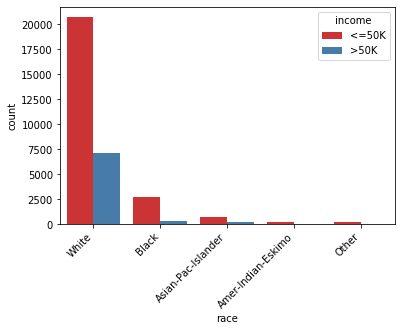

In [21]:
g=sns.countplot(x=income_ds["race"], hue=income_ds["income"],palette= "Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45, horizontalalignment='right')

[Text(0, 0, 'United-States'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'India'),
 Text(0, 0, '?'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Ireland'),
 Text(0, 0

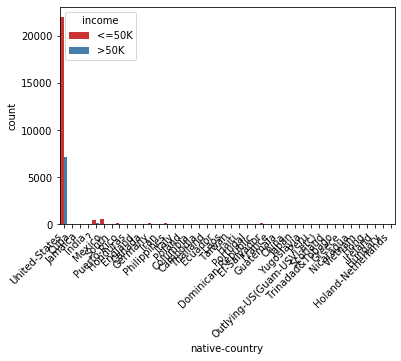

In [22]:
g=sns.countplot(x=income_ds["native-country"], hue=income_ds["income"],palette= "Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45, horizontalalignment='right')

There are too many categories in country,and most countries have too few observations.

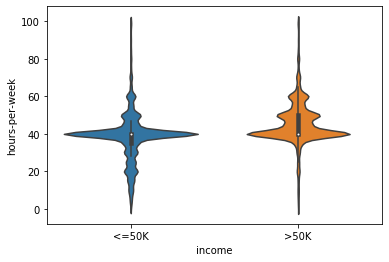

In [23]:
# hours work
sns.violinplot(x=income_ds["income"], y=income_ds["hours-per-week"])

**- Finally,let's check the balance of target income group**

In [24]:
income_ds["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

It's not a much balanced data. But we can't use upsampling or downsampling to maniulate the sample size cause we don't know the real proportion of earning in the real population. 

---------------------------------------------------------

# Data Cleaning

In [25]:
clean = income_ds.copy()

In [26]:
# delete the observation where workclass = "?"
clean = clean.drop(clean[clean["workclass"]=="?"].index, axis=0)

In [27]:
# merging levels of education
# since for those 1-12th grade, most of people have earnings <=50K, it's reasonable to merge them into one category due to less difference
clean['education']=np.where((clean["education"]=="12th")|(clean["education"]=="11th")|(clean["education"]=="10th")|
                            (clean["education"]=="9th")|(clean["education"]=="7th-8th")|(clean["education"]=="5th-6th")|
                             (clean['education'] =='1st-4th')|(clean['education'] =='Preschool'),
                            'Not-HS-Grad',clean['education'])
clean['education']=np.where((clean["education"]=="Assoc-voc")|(clean["education"]=="Assoc-acdm"),
                            'Assoc',clean['education'])

clean["marital-status"]=np.where((clean["marital-status"]=="Married-civ-spouse")|(clean["marital-status"]=="Married-spouse-absent")|
                                  (clean["marital-status"]=="Married-AF-spouse"),"Married", clean["marital-status"])

clean["marital-status"].value_counts()

Married          14750
Never-married     9917
Divorced          4259
Separated          959
Widowed            840
Name: marital-status, dtype: int64

**Encode the categorical variables.**

1) For independent variables, since we will use logistic regression, we need to get all the variables dummied and get rid of the first dummied result.

In [28]:
categori = {"workclass",
            "education",
            "marital-status",
            "race",
            "sex"
           }
for var in categori:
    if var != 'income':
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(clean[var], prefix=var,drop_first=True)
        clean = pd.concat([clean,cat_list], axis = 1)
        clean = clean.drop(var, 1)
clean.head()

,age,fnlwgt,education-num,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,...,race_Black,race_Other,race_White,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Not-HS-Grad,education_Prof-school,education_Some-college
0,39,77516,13,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K,...,0,0,1,1,0,0,0,0,0,0
1,50,83311,13,Exec-managerial,Husband,0,0,13,United-States,<=50K,...,0,0,1,1,0,0,0,0,0,0
2,38,215646,9,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K,...,0,0,1,0,0,1,0,0,0,0
3,53,234721,7,Handlers-cleaners,Husband,0,0,40,United-States,<=50K,...,1,0,0,0,0,0,0,1,0,0
4,28,338409,13,Prof-specialty,Wife,0,0,40,Cuba,<=50K,...,1,0,0,1,0,0,0,0,0,0


Drop the redundant variables.

In [29]:
clean.drop(["education-num","relationship","occupation","native-country"],axis=1,inplace=True)
clean.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,marital-status_Married,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,...,race_Black,race_Other,race_White,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Not-HS-Grad,education_Prof-school,education_Some-college
0,39,77516,2174,0,40,<=50K,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
1,50,83311,0,0,13,<=50K,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,38,215646,0,0,40,<=50K,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,53,234721,0,0,40,<=50K,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,<=50K,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


2) Encode the target variables into 1(>50K)/0(<=50K) 

In [30]:
clean["y"]=LabelEncoder().fit_transform(clean.income)
clean

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,marital-status_Married,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,...,race_Other,race_White,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Not-HS-Grad,education_Prof-school,education_Some-college,y
0,39,77516,2174,0,40,<=50K,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1,50,83311,0,0,13,<=50K,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,38,215646,0,0,40,<=50K,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,53,234721,0,0,40,<=50K,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,0,0,40,<=50K,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,<=50K,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32557,40,154374,0,0,40,>50K,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
32558,58,151910,0,0,40,<=50K,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
32559,22,201490,0,0,20,<=50K,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [31]:
clean["y"]=clean["y"].astype("category")

In [32]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 30 columns):
age                             30725 non-null int64
fnlwgt                          30725 non-null int64
capital-gain                    30725 non-null int64
capital-loss                    30725 non-null int64
hours-per-week                  30725 non-null int64
income                          30725 non-null object
marital-status_Married          30725 non-null uint8
marital-status_Never-married    30725 non-null uint8
marital-status_Separated        30725 non-null uint8
marital-status_Widowed          30725 non-null uint8
sex_Male                        30725 non-null uint8
workclass_Local-gov             30725 non-null uint8
workclass_Never-worked          30725 non-null uint8
workclass_Private               30725 non-null uint8
workclass_Self-emp-inc          30725 non-null uint8
workclass_Self-emp-not-inc      30725 non-null uint8
workclass_State-gov             30725 non-

---------------------------------

# First fit all data with logistic regression first

In [33]:
X=clean.copy().drop(["income","y"], axis=1)
y=clean.copy()["y"]

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=123, stratify=clean["y"])

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24580 entries, 21804 to 3365
Data columns (total 28 columns):
age                             24580 non-null int64
fnlwgt                          24580 non-null int64
capital-gain                    24580 non-null int64
capital-loss                    24580 non-null int64
hours-per-week                  24580 non-null int64
marital-status_Married          24580 non-null uint8
marital-status_Never-married    24580 non-null uint8
marital-status_Separated        24580 non-null uint8
marital-status_Widowed          24580 non-null uint8
sex_Male                        24580 non-null uint8
workclass_Local-gov             24580 non-null uint8
workclass_Never-worked          24580 non-null uint8
workclass_Private               24580 non-null uint8
workclass_Self-emp-inc          24580 non-null uint8
workclass_Self-emp-not-inc      24580 non-null uint8
workclass_State-gov             24580 non-null uint8
workclass_Without-pay           24580 no

In [35]:
# Fitting logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# write a function to get the prediction output
def get_result(estimator, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        display = metrics.plot_confusion_matrix(
                                     estimator,
                                     X_test,
                                     y_test,
                                     labels = y_test.unique(),
                                     cmap=plt.cm.Blues,
                                     values_format = '.2f',
                                     normalize = normalize) #if non-normalized, confusion matrix are counted in number;
                                                            #if normalized, confusion matrix are shown in percentage
        display.ax_.set_title(title)

        print(title)
        print(display.confusion_matrix)
        
    y_pred = estimator.predict(X_test)
    summary = metrics.precision_recall_fscore_support(y_test, y_pred, pos_label=">50K")
    print('\n\n')
    print('class:  \t<=50K\t\t>50K')
    print('precision:\t%.2f\t\t%.2f'%(summary[0][0],summary[0][1]))
    print('recall:  \t%.2f\t\t%.2f'%(summary[1][0],summary[1][1]))
    print('f1_score:\t%.2f\t\t%.2f'%(summary[2][0],summary[2][1]))
    print('support:\t%d\t\t%.d'%(summary[3][0],summary[3][1]))

Confusion matrix, without normalization
[[4432  183]
 [1107  423]]
Normalized confusion matrix
[[0.9603467  0.0396533 ]
 [0.72352941 0.27647059]]



class:  	<=50K		>50K
precision:	0.80		0.70
recall:  	0.96		0.28
f1_score:	0.87		0.40
support:	4615		1530


C:\Users\86136\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to '>50K') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


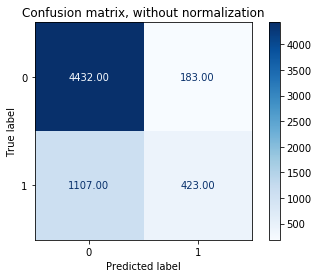

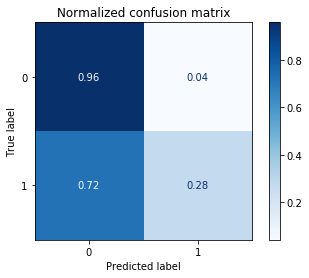

In [37]:
get_result(logreg, X_test, y_test)

From the result output, we can notice that **recall** and **F1-score** of income>50k is pretty low.
That is just for simply including all the features given in the dataset in the regression.

------------------------------------------

What will happen if we exclude the unnecessary features by regularization?

# Select Features

In [67]:
sel = SelectFromModel(LogisticRegression(penalty='l1',C=0.05, solver = "liblinear"))
sel.fit(X_train, y_train)
sel.get_support()

array([ True, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [68]:
# get which feature is left after lasso 
print(X_train.columns[sel.get_support(indices=True)])

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'marital-status_Married', 'marital-status_Never-married', 'sex_Male',
       'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'race_Asian-Pac-Islander', 'race_Black', 'race_White',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Not-HS-Grad', 'education_Prof-school',
       'education_Some-college'],
      dtype='object')


In [69]:
X_train_lasso = model.transform(X_train)
X_test_lasso = model.transform(X_test)

Confusion matrix, without normalization
[[4281  334]
 [ 701  829]]
Normalized confusion matrix
[[0.9276273  0.0723727 ]
 [0.45816993 0.54183007]]



class:  	<=50K		>50K
precision:	0.86		0.71
recall:  	0.93		0.54
f1_score:	0.89		0.62
support:	4615		1530


C:\Users\86136\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\86136\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to '>50K') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


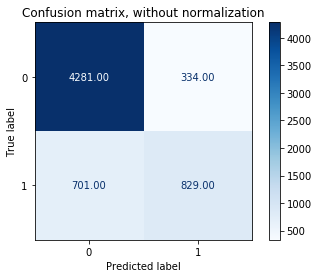

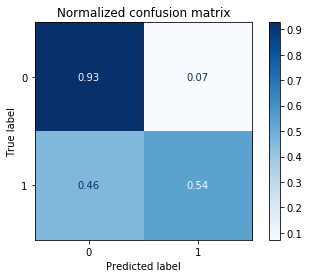

In [71]:
logreg = LogisticRegression()
logreg.fit(X_train_lasso, y_train)
get_result(logreg, X_test_lasso, y_test)